### Algorithm de gradiant stochastique 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as npr
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc

Valeur finale de theta : -0.07120997814067118


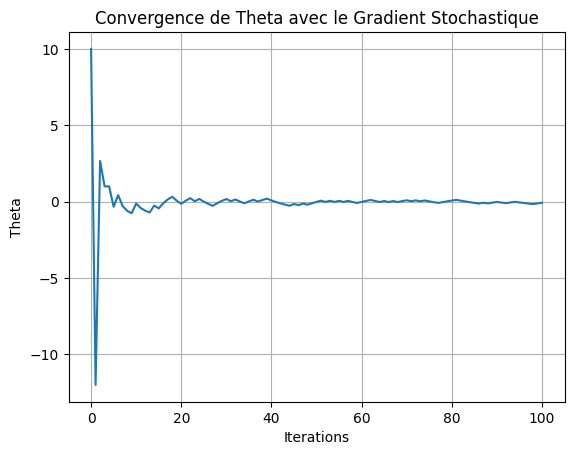

In [3]:
# la fonction f
def f(theta, x):
    return (x + theta) ** 2

# le gradiant 
def gradient(x, theta):
    return 2 * (x + theta)

# Algorithme de gradient stochastique
def gradient_stochastique(initial_theta, n_simulations,a,b):
    theta = [initial_theta]
    for i in range(1, n_simulations + 1):
        # Générer une nouvelle valeur de X selon la loi donnée
        u = npr.rand()
        x = 1 if u < 0.5 else -1
        
        # Taux d'apprentissage
        epsilon = a / (b+i)
        
        # Mise à jour de theta
        new_theta = theta[-1] - epsilon * gradient(x, theta[-1])
        theta.append(new_theta)
    return theta

# Initialisation
initial_theta = 10
n_simulations = 100
a=2
b=1

# Exécution de l'algorithme
theta_values = gradient_stochastique(initial_theta, n_simulations,a,b)

# Affichage du résultat
print("Valeur finale de theta :", theta_values[-1])

plt.plot(range(len(theta_values)), theta_values)
plt.xlabel("Iterations")
plt.ylabel("Theta")
plt.title("Convergence de Theta avec le Gradient Stochastique")
plt.grid(True)
plt.show()


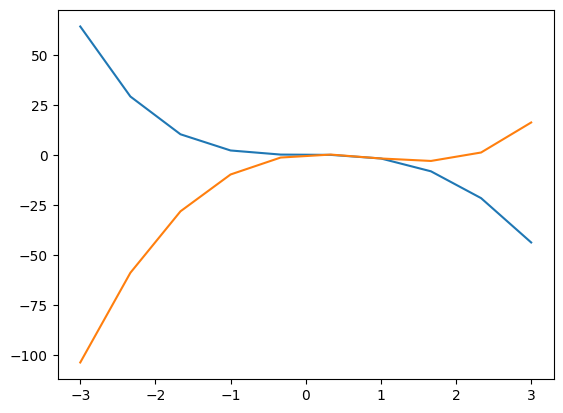

In [4]:
def f1(theta):
    return 2*((theta/2)**4-theta**3)

def f2(theta):
    return 2*((theta/2)**4+theta**3-3*theta**2 +theta)

t = np.linspace(-3,3,10)

plt.figure()
plt.plot(t,f1(t))
plt.plot(t,f2(t))
    

In [5]:
#leurs gradiant 
def grad_f1(theta):
    return 4 * (theta)**3 - 6 * theta**2
    
def grad_f2(theta):
    return 4 * (theta)**3 + 6 * theta**2 - 12 * theta + 2

In [6]:
# Algorithme de gradient stochastique
def gradient_stochastique(initial_theta, n_simulations, a, b, grad_function):
    theta = [initial_theta]
    for i in range(1, n_simulations + 1):
        # Taux d'apprentissage
        epsilon = a / (n_simulations*b + i)
        
        # Mise à jour de theta
        grad = grad_function(theta[-1])
        new_theta = theta[-1] - epsilon * grad
        theta.append(new_theta)
    return theta


In [7]:
# Initialisation des paramètres
initial_theta = 10
n_simulations = 100  
b = 10

# Exécution de l'algorithme pour f1 et f2

# ici on a represeenter theta1 et theta2, normalement on doit prendre thetat1 avec un proba P et theta2 avec un proba 1-p
theta_values_f1 = gradient_stochastique(initial_theta, n_simulations, a, b, grad_f1)
theta_values_f2 = gradient_stochastique(initial_theta, n_simulations, a, b, grad_f2)

## Exemple de l' Exo 1

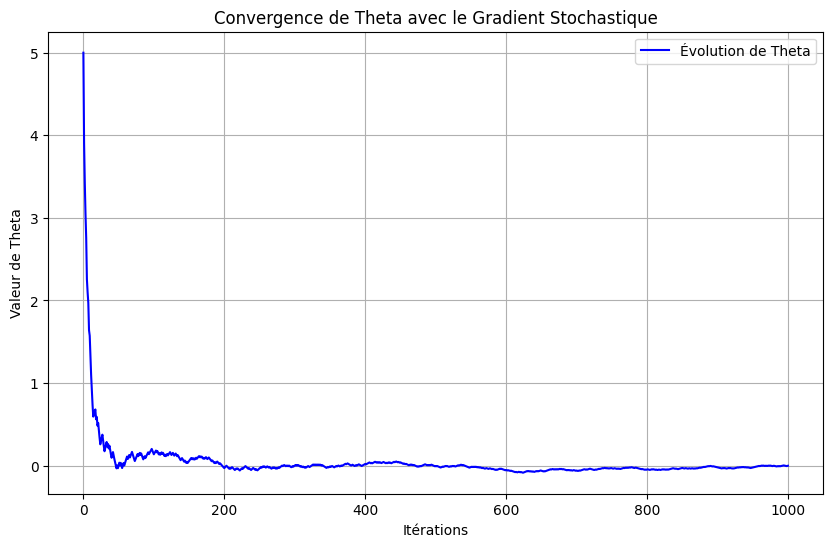

Valeur finale de theta : -0.001120607600898815


In [8]:
#Exercice 1

# Définition des fonctions f1 et f2
def f1(theta):
    return (theta - 1)**2

def f2(theta):
    return (theta + 1)**2

# Gradients de f1 et f2
def grad_f1(theta):
    return 2 * (theta - 1)

def grad_f2(theta):
    return 2 * (theta + 1)

# Algorithme de gradient stochastique
def gradient_stochastique_F(initial_theta, n_simulations, a, b):
    theta = [initial_theta]
    for i in range(1, n_simulations + 1):
        # Choix aléatoire entre f1 et f2
        u = npr.rand()
        if u < 0.5:
            grad = grad_f1(theta[-1])
        else:
            grad = grad_f2(theta[-1])
        
        # Taux d'apprentissage
        epsilon = a / (b + i)
        
        # Mise à jour de theta
        new_theta = theta[-1] - epsilon * grad
        theta.append(new_theta)

    return theta

# Initialisation des paramètres
initial_theta = 5
n_simulations = 1000
a = 1
b = 10

# Exécution de l'algorithme
theta_values = gradient_stochastique_F(initial_theta, n_simulations, a, b)

# Affichage de l'évolution de theta
plt.figure(figsize=(10, 6))
plt.plot(range(len(theta_values)), theta_values, label="Évolution de Theta", color="blue")
plt.xlabel("Itérations")
plt.ylabel("Valeur de Theta")
plt.title("Convergence de Theta avec le Gradient Stochastique")
plt.legend()
plt.grid()
plt.show()

# Valeur finale de theta
print("Valeur finale de theta :", theta_values[-1])


#####  Application au diagnostic précoce du cancer

In [9]:
import pandas as pd
# Importation des données   
design_matrix = pd.read_csv("design_matrix.csv")

In [10]:
design_matrix.head()

,Age,Sex,BMI,Antecedent_Family,Smoking_Years,Physical_Activity,Chronic_Conditions,Glucose_Level,Protein_Concentration,Cholesterol_Level,...,SNP_100,Pulmonary_Volume,Lesion_Size,Tissue_Density,Calcifications,Emphysema_Score,Diet_Fruits_Vegetables,Stress_Level,Alcohol_Consumption,Cancer_Status
0,57,F,21.3,Yes,3,High,Yes,129.4,11.74,248.0,...,0,3.79,4.34,0.31,No,28.1,0.9,Low,2.0,-1
1,87,F,18.5,No,4,Moderate,No,133.5,15.83,254.0,...,0,6.99,2.31,0.32,No,46.1,2.8,Low,2.0,-1
2,77,M,21.8,Yes,35,High,Yes,111.9,12.75,154.0,...,2,6.42,1.37,0.31,Yes,42.0,0.6,Low,5.5,-1
3,71,M,20.2,Yes,0,Moderate,No,76.1,6.78,262.0,...,1,5.00,3.18,0.26,No,23.1,4.8,Moderate,1.0,-1
4,40,M,20.7,No,9,Low,No,82.6,13.14,195.0,...,0,4.79,3.40,0.17,No,28.3,0.7,Low,4.6,-1


In [11]:
# Transformation des variables catégorielles en utilisant replace
design_matrix.replace({
    'Sex': {'F': 1, 'M': 0},
    'Antecedent_Family': {'Yes': 1, 'No': 0},
    'Physical_Activity': {'High': 0, 'Moderate': 1, 'Low': 0},
    'Chronic_Conditions': {'Yes': 1, 'No': 0},
    'Stress_Level': {'Low': 0, 'Moderate': 1, 'High': 2},
    'Calcifications': {'Yes': 1, 'No': 0}
}, inplace=True)


C:\Users\lamin\AppData\Local\Temp\ipykernel_18644\2501412425.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  design_matrix.replace({


In [12]:
# autrement on peut utiliser LabelEncoder (pour plusieur colonnes)
#from sklearn.preprocessing import LabelEncoder

#label_encoders = {}
#for col in ["Sex", "Antecedent_Family", "Physical_Activity", "Chronic_Conditions", "Stress_Level", "Calcifications"]:  
#    le = LabelEncoder()
#    X[col] = le.fit_transform(X[col])  
#    label_encoders[col] = le  # Save encoders if needed later


In [13]:
# Afficher les premières lignes pour vérifier les transformations
design_matrix.head()


,Age,Sex,BMI,Antecedent_Family,Smoking_Years,Physical_Activity,Chronic_Conditions,Glucose_Level,Protein_Concentration,Cholesterol_Level,...,SNP_100,Pulmonary_Volume,Lesion_Size,Tissue_Density,Calcifications,Emphysema_Score,Diet_Fruits_Vegetables,Stress_Level,Alcohol_Consumption,Cancer_Status
0,57,1,21.3,1,3,0,1,129.4,11.74,248.0,...,0,3.79,4.34,0.31,0,28.1,0.9,0,2.0,-1
1,87,1,18.5,0,4,1,0,133.5,15.83,254.0,...,0,6.99,2.31,0.32,0,46.1,2.8,0,2.0,-1
2,77,0,21.8,1,35,0,1,111.9,12.75,154.0,...,2,6.42,1.37,0.31,1,42.0,0.6,0,5.5,-1
3,71,0,20.2,1,0,1,0,76.1,6.78,262.0,...,1,5.00,3.18,0.26,0,23.1,4.8,1,1.0,-1
4,40,0,20.7,0,9,0,0,82.6,13.14,195.0,...,0,4.79,3.40,0.17,0,28.3,0.7,0,4.6,-1


In [14]:
#separation entere les variables explicatives et la variable cible
X = design_matrix.drop(columns=["Cancer_Status"])
Y = design_matrix["Cancer_Status"]

#diviser en ensemmble d'entrainement et ensemble test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

#standardisation des variables explicatives
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
theta_true = pd.read_csv("coefficients_a.csv")
theta_true = theta_true["Coefficient"]

In [17]:
import numpy as np
import pandas as pd

# Chargement des vrais coefficients
theta_true = pd.read_csv("coefficients_a.csv")["Coefficient"].values

np.random.seed(123)
n_simulations = 100000

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Gradient de la fonction perte
def grad_f(theta, y, x):
    return -y * x / (1 + np.exp(y * np.dot(theta, x)))

# Paramètres d'apprentissage
alpha = 0.001
beta = 500
F = np.zeros(n_simulations)

# Initialisation de theta avec la bonne dimension
theta = theta_true + np.random.uniform(-1, 1, size=theta_true.shape)

# Supposons que X_train et Y_train soient des numpy arrays
X_train = np.array(X_train)  # Conversion en numpy array si ce n'est pas déjà fait
Y_train = np.array(Y_train)  # Idem pour Y_train

n_samples, n_features = X_train.shape  # Mise à jour des dimensions

for k in range(n_simulations):
    eps = alpha / (1 + k / beta)
    i = np.random.randint(n_samples)  # Sélection aléatoire de l'échantillon
    theta -= eps * grad_f(theta, Y_train[i], X_train[i, :])  # Remplacement de .iloc[i] par [i]
    F[k] = np.linalg.norm(theta - theta_true, 2)  # Distance euclidienne

# Affichage des résultats
#print("Valeur finale de theta :", theta)
#print("Erreur finale :", F[-1])


ValueError: shapes (122,) and (121,) not aligned: 122 (dim 0) != 121 (dim 0)

La précision est: 0.50


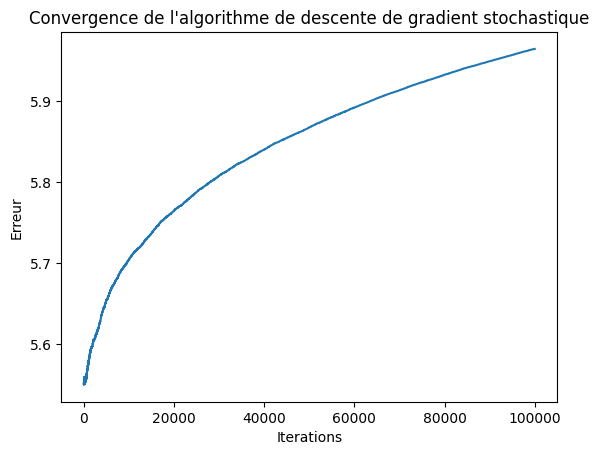

In [ ]:
# Prédiction et précision
class_pred = np.where(sigmoid(np.dot(X_test, theta)) >= 0.5, 1, -1)
accuracy = np.mean(class_pred == Y_test.values)

print(f"La précision est: {accuracy:.2f}")
plt.plot(range(n_simulations), F)
plt.xlabel("Iterations")
plt.ylabel("Erreur")
plt.title("Convergence de l'algorithme de descente de gradient stochastique")
plt.show()

# correction

C:\Users\lamin\AppData\Local\Temp\ipykernel_18644\57290605.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({


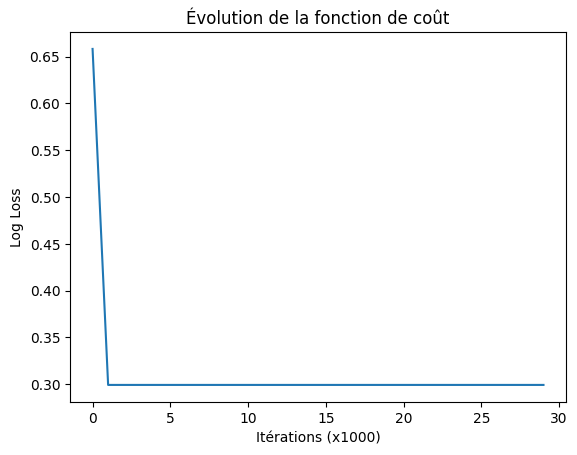

Accuracy: 0.323
Matrice de confusion:
[[   0 6601 3227]
 [   0    0    0]
 [   0 3721 6451]]


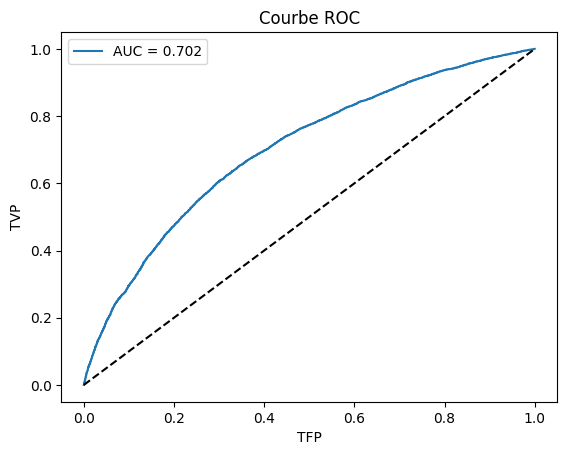

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

# Chargement des données
data = pd.read_csv("design_matrix.csv")

# Encodage des variables catégorielles
data.replace({
    'Sex': {'F': 1, 'M': 0},
    'Antecedent_Family': {'Yes': 1, 'No': 0},
    'Chronic_Conditions': {'Yes': 1, 'No': 0},
    'Calcifications': {'Yes': 1, 'No': 0}
}, inplace=True)

# One-Hot Encoding pour variables multi-classes
data = pd.get_dummies(data, columns=['Physical_Activity', 'Stress_Level'], drop_first=True)

# Séparation features / target
X = data.drop('Cancer_Status', axis=1)
y = data['Cancer_Status']

# Split train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Ajout d'une colonne de biais
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

# Fonction sigmoïde
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Fonction de coût
def logistic_loss(y, y_pred):
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

# Gradient stochastique
def stochastic_gradient_descent(X, y, n_iter=10000, lr=0.01, decay=0.1):
    n_samples, n_features = X.shape
    theta = np.zeros(n_features)
    losses = []
    
    for i in range(n_iter):
        idx = np.random.randint(n_samples)
        x_i = X[idx]
        y_i = y.iloc[idx]
        
        z = np.dot(x_i, theta)
        y_pred = sigmoid(z)
        
        gradient = (y_pred - y_i) * x_i
        theta -= lr * gradient
        
        # Décroissance du learning rate
        lr *= 1. / (1. + decay * i)
        
        if i % 1000 == 0:
            preds = sigmoid(X @ theta)
            loss = logistic_loss(y, preds)
            losses.append(loss)
            
    return theta, losses

# Entraînement du modèle
theta, training_loss = stochastic_gradient_descent(X_train, y_train, n_iter=30000, lr=0.1)

# Visualisation de la convergence
plt.plot(training_loss)
plt.title('Évolution de la fonction de coût')
plt.xlabel('Itérations (x1000)')
plt.ylabel('Log Loss')
plt.show()

# Prédictions
y_proba = sigmoid(X_test @ theta)
y_pred = (y_proba >= 0.5).astype(int)

# Évaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("Matrice de confusion:")
print(confusion_matrix(y_test, y_pred))

# Courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba):.3f}')
plt.plot([0,1], [0,1], 'k--')
plt.title('Courbe ROC')
plt.xlabel('TFP')
plt.ylabel('TVP')
plt.legend()
plt.show()

In [20]:
print("Valeurs uniques dans Y_train :", np.unique(Y_train))
print("Valeurs uniques dans Y_test :", np.unique(Y_test))


Valeurs uniques dans Y_train : [-1  1]
Valeurs uniques dans Y_test : [-1  1]


In [21]:
class_pred = np.where(sigmoid(np.dot(X_test, theta)) >= 0.5, 1, -1)


In [22]:
from sklearn.metrics import confusion_matrix

print("Matrice de confusion corrigée :")
print(confusion_matrix(Y_test, class_pred, labels=[0, 1]))  # Assurer qu'on compare bien 0 et 1


Matrice de confusion corrigée :
[[   0    0]
 [   0 4886]]


C:\Users\lamin\AppData\Local\Temp\ipykernel_18644\733889320.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({
C:\Users\lamin\AppData\Local\Temp\ipykernel_18644\733889320.py:40: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


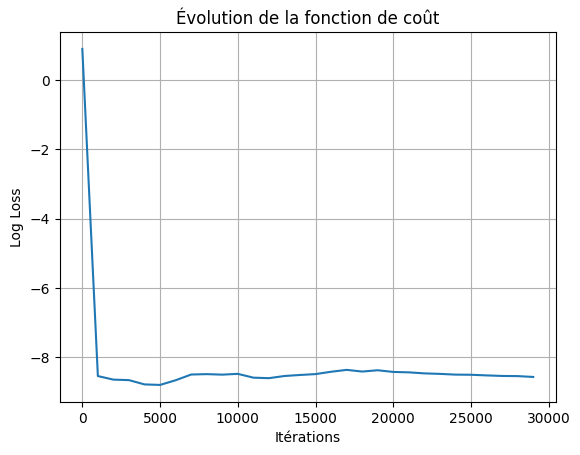

Accuracy: 0.379
Matrice de confusion :
[[   0 9036  792]
 [   0    0    0]
 [   0 2590 7582]]


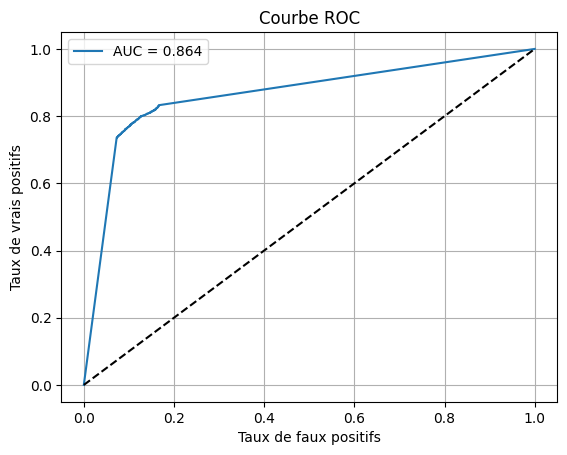

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

# 🔹 Chargement des données
data = pd.read_csv("design_matrix.csv")

# 🔹 Encodage des variables catégorielles
data.replace({
    'Sex': {'F': 1, 'M': 0},
    'Antecedent_Family': {'Yes': 1, 'No': 0},
    'Chronic_Conditions': {'Yes': 1, 'No': 0},
    'Calcifications': {'Yes': 1, 'No': 0}
}, inplace=True)

# 🔹 One-Hot Encoding pour les variables multiclasses
data = pd.get_dummies(data, columns=['Physical_Activity', 'Stress_Level'], drop_first=True)

# 🔹 Séparation des variables explicatives et de la cible
X = data.drop(columns=['Cancer_Status'])
y = data['Cancer_Status'].values  # Conversion en numpy array

# 🔹 Division en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Normalisation des variables explicatives
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 🔹 Ajout d'une colonne de biais (après normalisation)
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

# 🔹 Fonction sigmoïde
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# 🔹 Fonction de coût logistique
def logistic_loss(y, y_pred):
    epsilon = 1e-15  # Pour éviter log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

# 🔹 Algorithme de Gradient Stochastique
def stochastic_gradient_descent(X, y, n_iter=10000, lr=0.01, decay=0.0001):
    n_samples, n_features = X.shape
    theta = np.zeros(n_features)
    losses = []
    
    for i in range(n_iter):
        idx = np.random.randint(n_samples)  # Sélection aléatoire d'un échantillon
        x_i = X[idx]
        y_i = y[idx]
        
        # Prédiction
        z = np.dot(x_i, theta)
        y_pred = sigmoid(z)
        
        # Mise à jour de theta
        gradient = (y_pred - y_i) * x_i
        theta -= (lr / (1 + decay * i)) * gradient  # Correction de la décroissance de lr
        
        # Stockage de la perte
        if i % 1000 == 0:
            preds = sigmoid(X @ theta)
            loss = logistic_loss(y, preds)
            losses.append(loss)
            
    return theta, losses

# 🔹 Entraînement du modèle
theta, training_loss = stochastic_gradient_descent(X_train, y_train, n_iter=30000, lr=0.1)

# 🔹 Visualisation de la convergence
plt.plot(np.arange(0, len(training_loss) * 1000, 1000), training_loss)
plt.title("Évolution de la fonction de coût")
plt.xlabel("Itérations")
plt.ylabel("Log Loss")
plt.grid()
plt.show()

# 🔹 Prédictions
y_proba = sigmoid(X_test @ theta)
y_pred = (y_proba >= 0.5).astype(int)

# 🔹 Évaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

# 🔹 Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de confusion :")
print(conf_matrix)

# 🔹 Courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_proba):.3f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Courbe ROC")
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.legend()
plt.grid()
plt.show()
